In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Num GPUs Available:  1
Default GPU Device:/device:GPU:0


In [2]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

58889256/58889256 [==============================] - 19s 0us/step


In [3]:
base_model.trainable = False

In [4]:
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(units = 512, activation='relu')(x)
outputs = keras.layers.Dense(units = 8, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 14,981,448
Trainable params: 266,760
Non-trainable params: 14,714,688
___________________________________________

In [6]:
model.compile(loss='categorical_crossentropy', 
              #optimizer='adam', 
              metrics='accuracy')

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator
datagen_train = ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    validation_split=0.2
)


In [10]:
# load and iterate training dataset
train_it = datagen_train.flow_from_directory(
    "C:\\programowanie\\RYBY2\\train",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=64,
    subset='training'
)

# load and iterate validation dataset
valid_it = datagen_train.flow_from_directory(
    "C:\\programowanie\\RYBY2\\train",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=64,
    subset='validation'
)

Found 3025 images belonging to 8 classes.
Found 752 images belonging to 8 classes.


In [11]:
model.fit(train_it, steps_per_epoch=12, 
          validation_data=valid_it, validation_steps=4, epochs=10)

Epoch 1/10
12/12 [==============================] - 20s 1s/step - loss: 8.0322 - accuracy: 0.3135 - val_loss: 3.3774 - val_accuracy: 0.5117
Epoch 2/10
12/12 [==============================] - 14s 1s/step - loss: 3.3062 - accuracy: 0.4202 - val_loss: 1.7985 - val_accuracy: 0.5391
Epoch 3/10
12/12 [==============================] - 15s 1s/step - loss: 2.1867 - accuracy: 0.4922 - val_loss: 1.9200 - val_accuracy: 0.5977
Epoch 4/10
12/12 [==============================] - 15s 1s/step - loss: 1.8097 - accuracy: 0.5065 - val_loss: 1.5753 - val_accuracy: 0.5742
Epoch 5/10
12/12 [==============================] - 15s 1s/step - loss: 1.5367 - accuracy: 0.5312 - val_loss: 1.1817 - val_accuracy: 0.5977
Epoch 6/10
12/12 [==============================] - 15s 1s/step - loss: 1.4949 - accuracy: 0.5638 - val_loss: 1.0188 - val_accuracy: 0.6562
Epoch 7/10
12/12 [==============================] - 15s 1s/step - loss: 1.2909 - accuracy: 0.5938 - val_loss: 0.9212 - val_accuracy: 0.6641
Epoch 8/10
12/12 [==

In [12]:
base_model.trainable = True

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss='categorical_crossentropy',
              metrics='accuracy')

In [18]:
model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=1)

12/12 [==============================] - 20s 2s/step - loss: 0.3161 - accuracy: 0.9001 - val_loss: 0.4806 - val_accuracy: 0.8125


In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

array([[9.9907160e-01, 9.0290960e-05, 1.6212826e-07, 1.8396836e-13,
        5.4521789e-04, 2.8896332e-04, 1.3445346e-10, 3.8348030e-06]],
      dtype=float32)

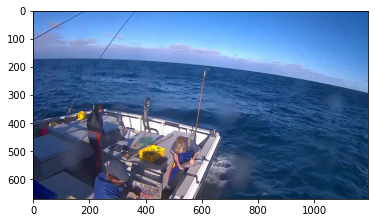

In [20]:
make_predictions('D:\\the-nature-conservancy-fisheries-monitoring\\train/ALB/img_00032.jpg')

In [16]:
model.save('vgg16_fish_model')

INFO:tensorflow:Assets written to: vgg16_fish_model\assets
